### Coarse Tip Clearance Test Objective


### Procedure
- Initiate sweep from 30-100% throttle in increments of 5%, holding each throttle for 2 seconds.
- At each throttle step, allow ~0.5s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Duct Inner Diameter   | Propeller Diameter | Static Tip Clearance | Clearance to Height Ratio (%) | Test Status |
|-                      |-                   |-                     |-                              |-            |
| 137 mm                | 5 in / 127 mm      | 5 mm                 | 71.4 %                        | Waiting     |
| 133 mm                | 5 in / 127 mm      | 3 mm                 | 42.9 %                        | Waiting     |
| 129 mm                | 5 in / 127 mm      | 1 mm                 | 14.3 %                        | Waiting     |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.
- We expect all three 3D printed ducts to consume more power and produce less thrust relative to an equivalent propeller in open air. This is because the tip clearance to blade height ratio is too high for the duct to prevent the formation of blade tip vortices. These vortices are trapped by the duct rather than diffusing into open air, resulting in additional power loss.  

In [395]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 0 to 100% throttle in increments of 5%, holding at each step for 2 seconds

In [396]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

In [397]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

### Execute Tests

In [423]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [425]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: 
Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 489,0,0,16.023001,10.240000,0.305340,-0.180830,2.029905,0.000000

Rx: 5162,0,0,15.246000,10.240000,0.189020,-0.166920,2.029905,-0.000003

Rx: 9169,0,0,14.931000,10.240000,0.305340,-0.111280,2.029905,0.000000

Rx: 13157,0,0,14.889000,10.240000,0.334420,-0.180830,2.029905,0.000000

Rx: 17169,0,0,14.847000,10.240000,0.189020,-0.139100,2.029905,0.000000

Rx: 21157,0,0,14.784000,10.240000,0.319880,-0.125190,2.029905,-0.000003

Rx: 25169,0,0,14.826000,10.240000,0.2

In [426]:
test_directory = Path("../test_data/coarse_tip_clearance/")

In [464]:
data_dict = {}

data_dict["test_5in_6blade_1mm_pb_0"] = test_run(
    filename=test_directory / "test_5in_6blade_1mm_pb_0.csv", plan=plan
)
data_dict["test_5in_6blade_1mm_pb_1"] = test_run(
    filename=test_directory / "test_5in_6blade_1mm_pb_1.csv", plan=plan
)
data_dict["test_5in_6blade_1000um_0"] = test_run(
    filename=test_directory / "test_5in_6blade_1000um_0.csv", plan=plan
)
data_dict["test_5in_6blade_1000um_1"] = test_run(
    filename=test_directory / "test_5in_6blade_1000um_1.csv", plan=plan
)
# data_dict["test_5in_6blade_1500um_0"] = test_run(
#     filename=test_directory / "test_5in_6blade_1500um_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_1500um_1"] = test_run(
#     filename=test_directory / "test_5in_6blade_1500um_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_3000um_0"] = test_run(
#     filename=test_directory / "test_5in_6blade_3000um_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_3000um_1"] = test_run(
#     filename=test_directory / "test_5in_6blade_3000um_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_recal_0"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_recal_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_recal_1"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_recal_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_shaved_0"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_shaved_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_shaved_1"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_shaved_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_shaved_low_soc"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_shaved_low_soc.csv", plan=plan
# )

Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [452]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  bottom_motor_rpm  \
test_name                time_ms                                      
test_5in_6blade_1mm_14V  0.313             1228.0            1242.0   
                         4.175                0.0               0.0   
                         8.170                0.0               0.0   
                         12.176               0.0               0.0   
                         16.170               0.0               0.0   
...                                           ...               ...   
test_5in_6blade_1000um_1 41965.157         1600.0            1600.0   
                         41969.165         1571.0            1557.0   
                         41973.157         1514.0            1442.0   
                         41977.161         1457.0            1457.0   
                         41981.150         1400.0            1385.0   

                                    batt_voltage_V  batt_current_A  \
test_name                time_ms                                     
test_5in_6blade_1mm_14V  0.313           14.784000           10.24   
                         4.175           14.784000           10.24   
                         8.170           14.784000           10.24   
                         12.176          14.826000           10.24   
                         16.170          14.784000           10.24   
...                                            ...             ...   
test_5in_6blade_1000um_1 41965.157       16.023001           10.24   
                         41969.165       16.023001           10.24   
                         41973.157       16.023001           10.24   
                         41977.161       16.023001           10.24   
                         41981.150       16.023001           10.24   

                                    top_current_A  bottom_current_A  thrust_N  \
test_name                time_ms                                                
test_5in_6blade_1mm_14V  0.313            0.36350          -0.19474  1.904489   
                         4.175            0.43620          -0.12519  1.904489   
                         8.170            0.34896          -0.25038  1.904489   
                         12.176           0.34896          -0.20865  1.904489   
                         16.170           0.45074          -0.11128  1.904489   
...                                           ...               ...       ...   
test_5in_6blade_1000um_1 41965.157       -0.01454          -0.41730  4.903668   
                         41969.165        0.14540          -0.47294  4.903668   
                         41973.157        0.07270          -0.38948  4.903668   
                         41977.161        0.07270          -0.33384  4.903668   
                         41981.150        0.14540          -0.40339  4.903668   

                                    torque_N  
test_name                time_ms              
test_5in_6blade_1mm_14V  0.313     -0.000003  
                         4.175      0.000000  
                         8.170      0.000000  
                         12.176     0.000000  
                         16.170    -0.000003  
...                                      ...  
test_5in_6blade_1000um_1 41965.157  0.000000  
                         41969.165 -0.000003  
                         41973.157 -0.000003  
                         41977.161  0.000000  
                         41981.150  0.000000  

[41986 rows x 8 columns]

In [454]:
# Select single test to analyze closer
test_data = df_all.loc["test_5in_6blade_1000um_0"]
test_data

,top_motor_rpm,bottom_motor_rpm,batt_voltage_V,batt_current_A,top_current_A,bottom_current_A,thrust_N,torque_N
time_ms,,,,,,,,
0.476,0.0,0.0,18.186001,10.24,0.14540,-0.20865,2.993658,0.000000
5.162,0.0,0.0,17.304001,10.24,0.18902,-0.29211,2.993658,-0.000003
9.165,0.0,0.0,17.073000,10.24,0.14540,-0.23647,2.993658,-0.000003
13.164,0.0,0.0,16.947001,10.24,0.10178,-0.20865,2.993658,0.000000
17.161,0.0,0.0,16.926001,10.24,0.15994,-0.20865,2.993658,0.000000
...,...,...,...,...,...,...,...,...
41965.157,2328.0,2285.0,16.023001,10.24,0.05816,-0.15301,4.471817,0.000000
41969.161,2214.0,2142.0,16.023001,10.24,0.04362,-0.54249,4.471817,-0.000003
41973.161,2100.0,2042.0,16.023001,10.24,-0.04362,-0.34775,4.471817,-0.000003


In [455]:
# Extract raw data from a loaded test csv
top_current_raw = test_data["top_current_A"]
bottom_current_raw = test_data["bottom_current_A"]
hall_current_raw = top_current_raw + bottom_current_raw

shunt_current_raw = test_data["batt_current_A"]
batt_voltage = test_data["batt_voltage_V"]

top_rpm = test_data["top_motor_rpm"]
bottom_rpm = test_data["bottom_motor_rpm"]

thrust_N = test_data["thrust_N"]
time_ms = test_data.index

# Determine mean sample rate
sample_rate_ms = np.mean(np.diff(time_ms))

In [456]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm             bottom_motor_rpm  \
                                            mean         std             mean   
test_name                 throttle                                              
test_5in_6blade_1000um_0  5             1752.072   12.075183         1758.536   
                          10            3138.288   23.438655         3154.696   
                          15            4402.032   41.059646         4465.256   
                          20            5696.148   50.895101         5744.248   
                          25            6804.872   48.733927         6960.544   
...                                          ...         ...              ...   
test_5in_6blade_1mm_14V_1 80           13421.768  109.790427        13930.432   
                          85           13946.536  101.675446        14575.480   
                          90           14525.692  100.703814        15167.752   
                          95           14963.052   76.459726        15620.448   
                          100          15448.884   63.943990        16164.700   

                                               batt_voltage_V            \
                                           std           mean       std   
test_name                 throttle                                        
test_5in_6blade_1000um_0  5          28.397224      16.866613  0.019083   
                          10         34.902900      16.846452  0.019091   
                          15         46.447778      16.823939  0.016413   
                          20         33.928973      16.788491  0.024246   
                          25         51.791132      16.724316  0.023424   
...                                        ...            ...       ...   
test_5in_6blade_1mm_14V_1 80        107.947245      11.967900  0.036700   
                          85         79.417366      11.725812  0.029770   
                          90         49.725456      11.562264  0.027492   
                          95        102.245665      11.467680  0.020634   
                          100        71.051610      11.300100  0.025960   

                                   batt_current_A           top_current_A  \
                                             mean       std          mean   
test_name                 throttle                                          
test_5in_6blade_1000um_0  5              10.24000  0.000000      0.229267   
                          10             10.24000  0.000000      0.361930   
                          15             10.24000  0.000000      0.542400   
                          20             10.24000  0.000000      0.728221   
                          25             10.24000  0.000000      1.002388   
...                                           ...       ...           ...   
test_5in_6blade_1mm_14V_1 80             23.08992  1.380946      9.256455   
                          85             25.79104  1.255052     10.579653   
                          90             29.02752  1.016881     12.268619   
                          95             32.32064  0.740051     13.960610   
                          100            35.62720  0.402150     15.576179   

                                             bottom_current_A            \
                                         std             mean       std   
test_name                 throttle                                        
test_5in_6blade_1000um_0  5         0.129600        -0.173819  0.099515   
                          10        0.243524        -0.049019  0.215465   
                          15        0.389412         0.106495  0.345269   
                          20        0.608272         0.380355  0.568512   
                          25        0.800841         0.839441  0.807246   
...                                      ...              ...       ...   
test_5in_6blade_1mm_14V_1 80        2.176414        10.521413  1.744893   
                    

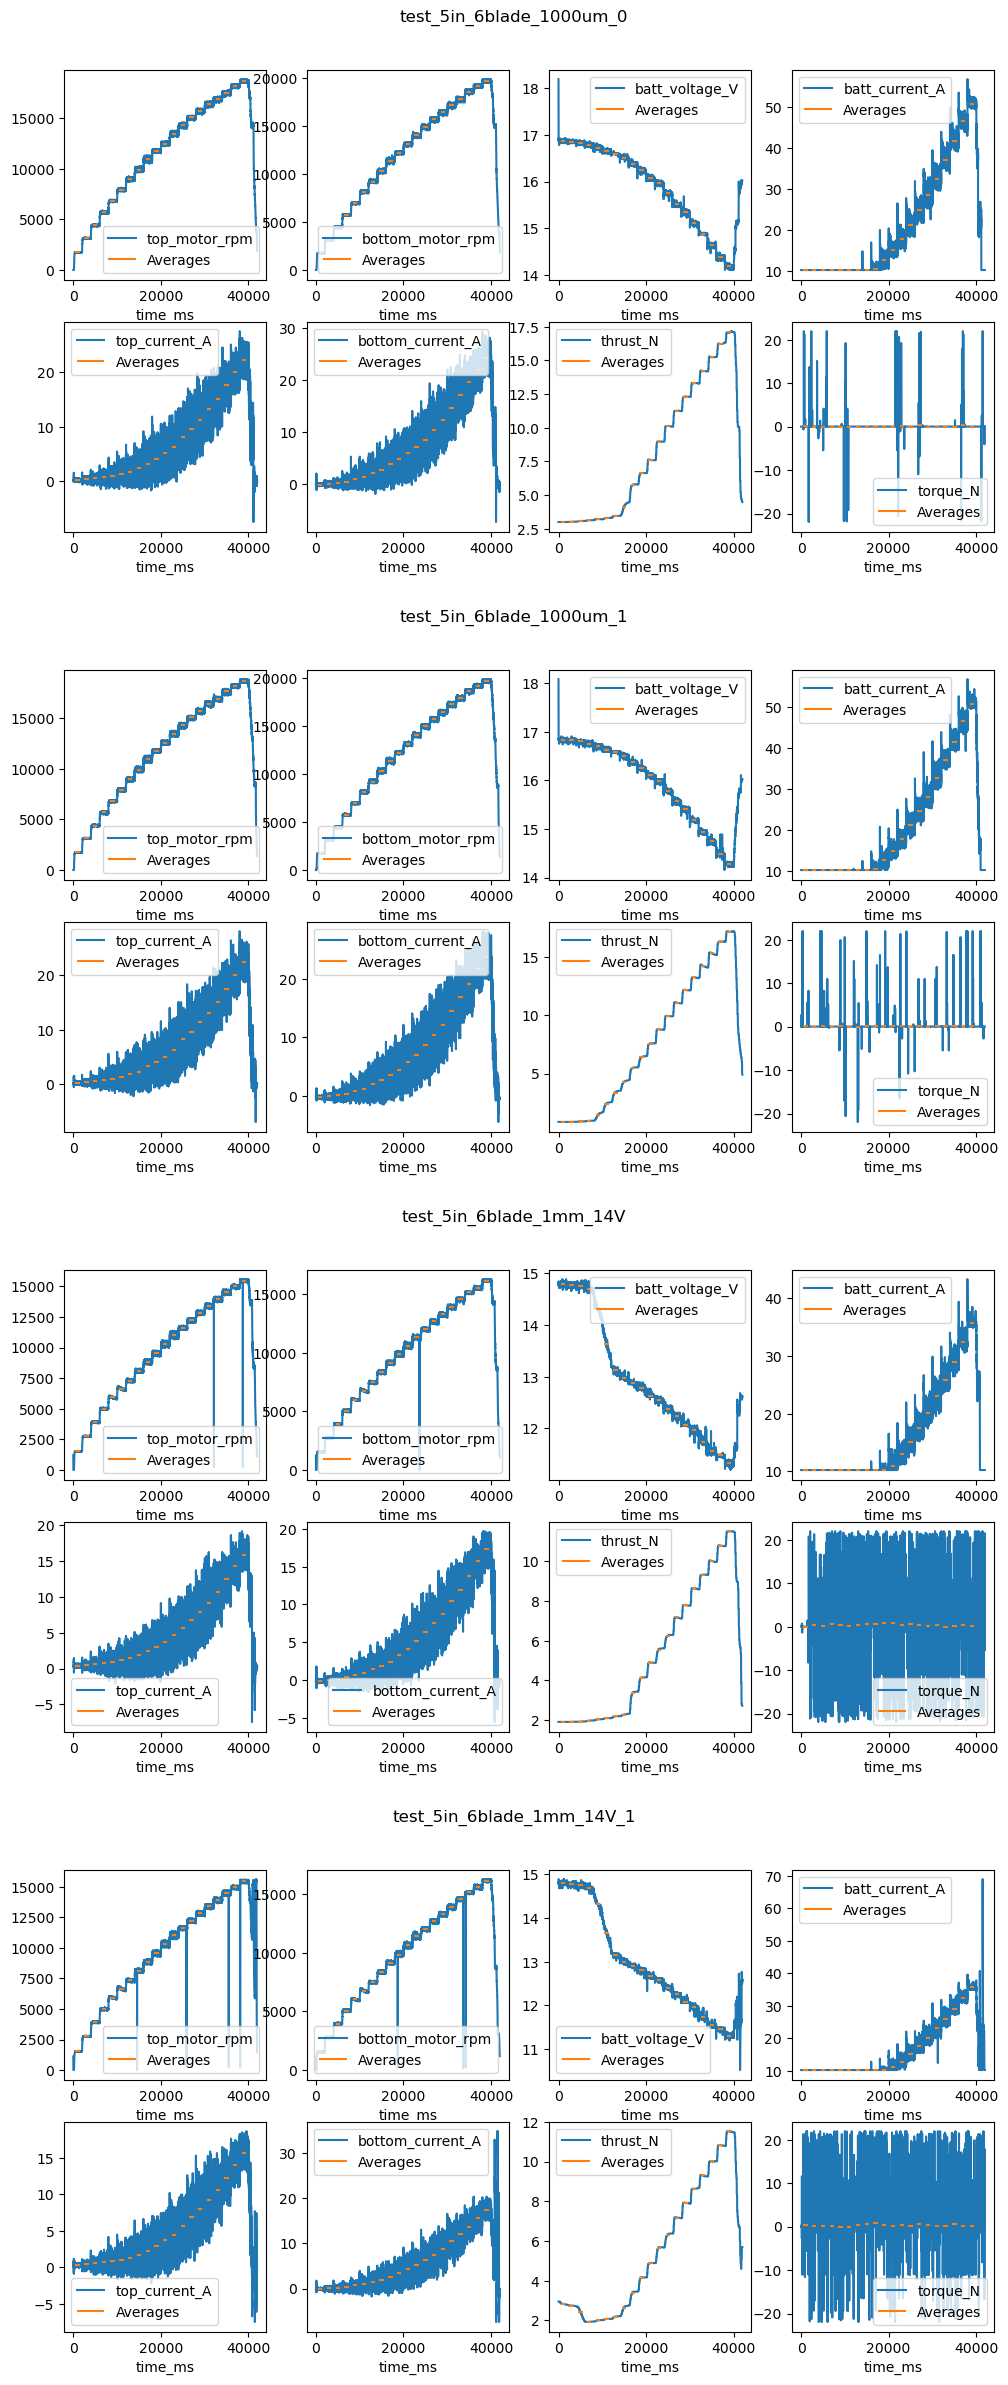

In [457]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [458]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = 5

hover_thrust_g = 750
payload_thrust_g = 1200

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = 0.025 / 14.8

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

df_thrust_power = pd.DataFrame(
    {
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": batt_power_rel_err * batt_power_mean,
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

batt_power_rel_err

test_name                  throttle
test_5in_6blade_1000um_0   5           6.757255
                           10          1.216252
                           15          0.598382
                           20          0.359772
                           25          0.225680
                                         ...   
test_5in_6blade_1mm_14V_1  80          0.041854
                           85          0.039513
                           90          0.037364
                           95          0.035615
                           100         0.034295
Name: mean, Length: 80, dtype: float64

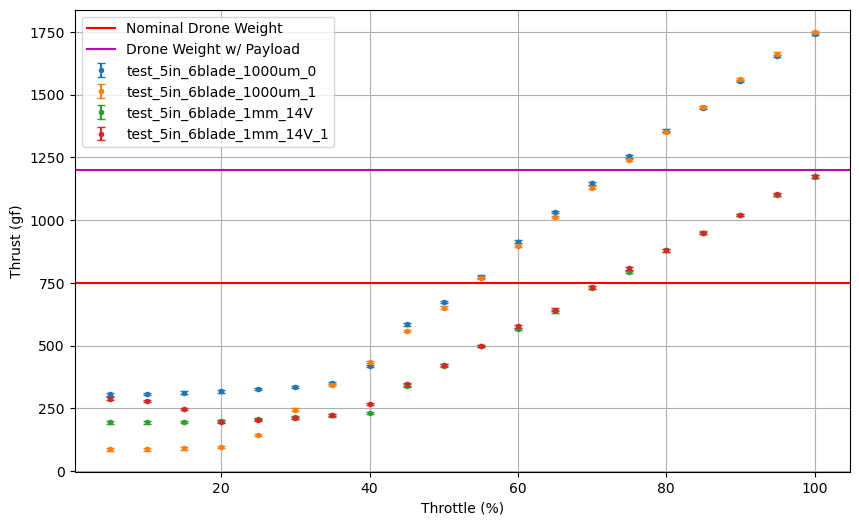

In [459]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    # plt.errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
    plt.errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
plt.axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
plt.axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
plt.legend()
plt.grid()
plt.show()

In [460]:
# TODO: nominal thrust-weight ratio plot
# thrust_mean_g.iloc[-1] / hover_thrust_g

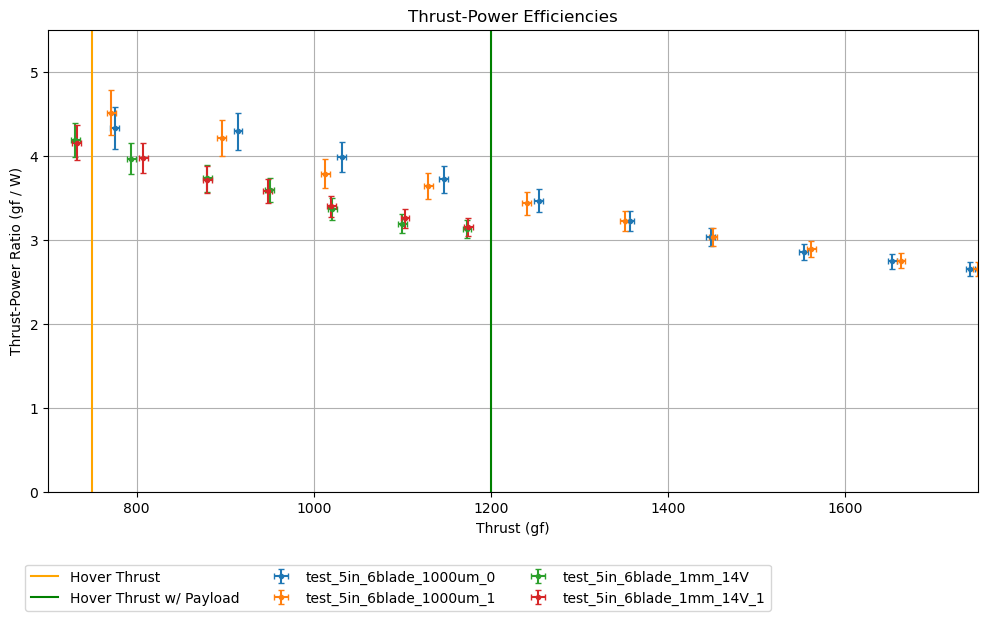

In [461]:
fig = plt.figure(figsize=(12, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.errorbar(x="thrust_mean_g", y="thrust_power_g_W", xerr="thrust_g_err", yerr="thrust_power_err", data=grp, label=n, fmt='o', markersize=3, capsize=2)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
plt.xlim(700, 1750)
plt.ylim(0,5.5)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

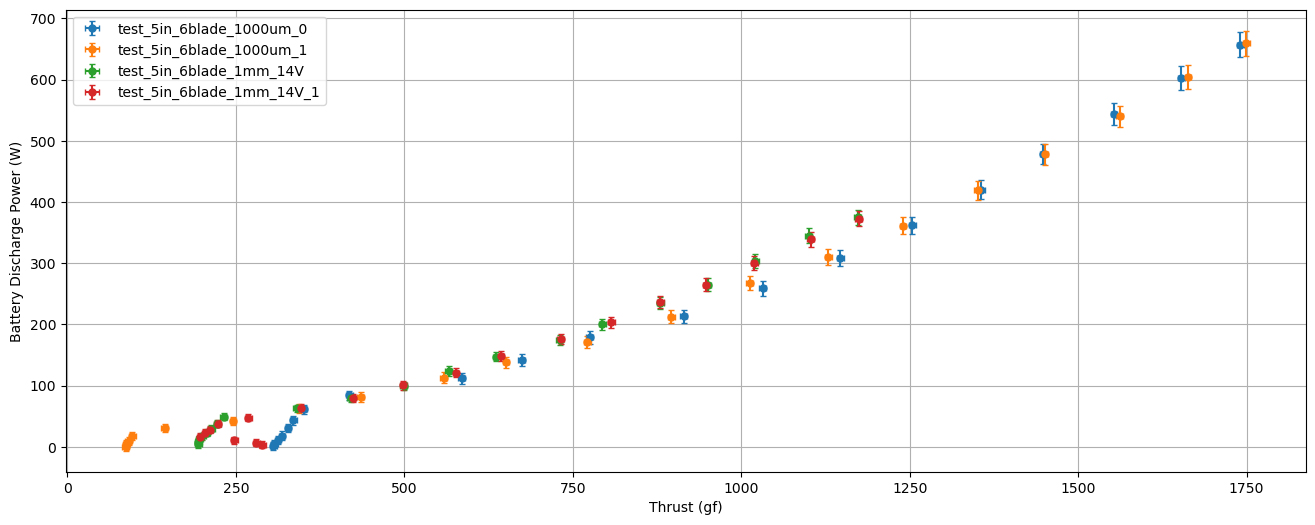

In [462]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    #plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=20)
    plt.errorbar(x="thrust_mean_g", y="batt_power_mean", xerr="thrust_g_err", yerr="batt_power_err", label=n, data=grp, fmt='o', capsize=2, markersize=5)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
#plt.xlim(700, 1750)
plt.grid()
#plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
#plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

In [384]:
characteristic_thrust = pd.Index(
    [hover_thrust_g, payload_thrust_g], name="thrust_mean_g"
)
# Interpolate power at hover and payload thrust
df_power_interp = (
    df_thrust_power.reset_index("throttle")
    .set_index("thrust_mean_g", append=True)
    .groupby("test_name")
    .apply(
        lambda g: (gd := g.droplevel("test_name").dropna())[
            ~gd.index.duplicated(keep="first")
        ]
        .reindex(gd.index.append(characteristic_thrust).unique())
        .sort_index()
        .interpolate(method="index", limit_area="inside")
        .loc[characteristic_thrust]
    )
)
df_power_interp

throttle  \
test_name                               thrust_mean_g              
test_5in_6blade_1000um_0                750.0          53.762078   
                                        1200.0         72.483014   
test_5in_6blade_1000um_1                750.0          54.113810   
                                        1200.0         73.191222   
test_5in_6blade_1500um_0                750.0          58.377699   
                                        1200.0         79.552445   
test_5in_6blade_1500um_1                750.0          59.142260   
                                        1200.0         80.710307   
test_5in_6blade_3000um_0                750.0          60.444620   
                                        1200.0         84.655074   
test_5in_6blade_3000um_1                750.0          61.158002   
                                        1200.0         85.867095   
test_5in_6blade_open_air_recal_0        750.0          47.023932   
                                        1200.0         65.690488   
test_5in_6blade_open_air_recal_1        750.0          46.995082   
                                        1200.0         65.282939   
test_5in_6blade_open_air_shaved_0       750.0          46.432866   
                                        1200.0         65.016299   
test_5in_6blade_open_air_shaved_1       750.0          46.622289   
                                        1200.0         65.029234   
test_5in_6blade_open_air_shaved_low_soc 750.0          47.461328   
                                        1200.0         66.450717   

                                                       batt_power_mean  \
test_name                               thrust_mean_g                    
test_5in_6blade_1000um_0                750.0               169.829458   
                                        1200.0              335.068228   
test_5in_6blade_1000um_1                750.0               165.104814   
                                        1200.0              342.817005   
test_5in_6blade_1500um_0                750.0               207.911621   
                                        1200.0              416.852194   
test_5in_6blade_1500um_1                750.0               206.254562   
                                        1200.0              428.325247   
test_5in_6blade_3000um_0                750.0               207.690507   
                                        1200.0              460.823609   
test_5in_6blade_3000um_1                750.0               212.887600   
                                        1200.0              464.056814   
test_5in_6blade_open_air_recal_0        750.0               156.288065   
                                        1200.0              330.665422   
test_5in_6blade_open_air_recal_1        750.0               156.784806   
                                        1200.0              329.983106   
test_5in_6blade_open_air_shaved_0       750.0               155.888256   
                                        1200.0              327.396447   
test_5in_6blade_open_air_shaved_1       750.0               152.796386   
                                        1200.0              321.973234   
test_5in_6blade_open_air_shaved_low_soc 750.0               156.149033   
                                        1200.0              334.432785   

                                                       shunt_power_mean  \
test_name                               thrust_mean_g                     
test_5in_6blade_1000um_0                750.0                233.567394   
                                        1200.0               410.825844   
test_5in_6blade_1000um_1                750.0                232.815045   
                                        1200.0               413.625631   
test_5in_6blade_1500um_0                750.0                274.732503   
                                        1200.0               497.889424   
test_5in_6blade_1500um_1                750.0 

In [385]:
battery_capacity_Wh = 2 * 0.850 * 14.8
flight_time = pd.to_timedelta(
    battery_capacity_Wh / df_power_interp["batt_power_mean"], unit="h"
).rename("flight_time")
flight_time

test_name                                thrust_mean_g
test_5in_6blade_1000um_0                 750.0           0 days 00:08:53.335034214
                                         1200.0          0 days 00:04:30.321064106
test_5in_6blade_1000um_1                 750.0           0 days 00:09:08.596966399
                                         1200.0          0 days 00:04:24.210930914
test_5in_6blade_1500um_0                 750.0           0 days 00:07:15.646643882
                                         1200.0          0 days 00:03:37.285650306
test_5in_6blade_1500um_1                 750.0           0 days 00:07:19.146651078
                                         1200.0          0 days 00:03:31.465470646
test_5in_6blade_3000um_0                 750.0           0 days 00:07:16.110447546
                                         1200.0          0 days 00:03:16.552429700
test_5in_6blade_3000um_1                 750.0           0 days 00:07:05.463954206
                                

<Axes: title={'center': 'Flight time with a 4S 1700mAh battery pack'}, xlabel='Thrust (gf)', ylabel='Flight time (minutes)'>

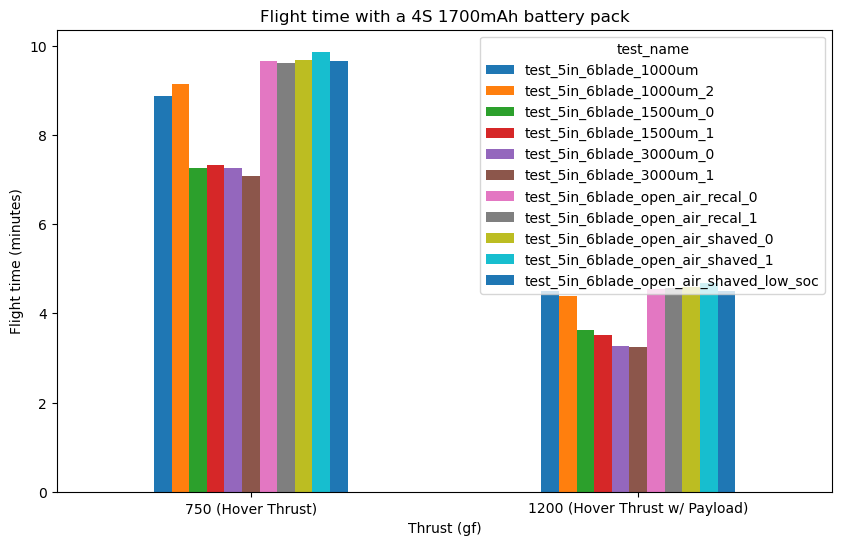

In [350]:
(
    flight_time.dt.seconds.unstack("test_name").rename(
        index={
            hover_thrust_g: f"{hover_thrust_g} (Hover Thrust)",
            payload_thrust_g: f"{payload_thrust_g} (Hover Thrust w/ Payload)",
        }
    )
    / 60
).plot.bar(
    title="Flight time with a 4S 1700mAh battery pack",
    xlabel="Thrust (gf)",
    ylabel="Flight time (minutes)",
    rot=0,
    figsize=(10, 6)
)